<a href="https://colab.research.google.com/github/pragyeshmishy/Flipkart-SentimentAnalysis/blob/main/Flipkart_SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [67]:
# Importing the dataset
DATASET_COLUMNS=['Name','Account','Date','Comments','Retweet','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('/content/drive/MyDrive/twiterdata.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.sample(5)

,Name,Account,Date,Comments,Retweet,text
237,FlashSaleTricks,@FlashSaleTricks,"Oct 14, 2017",NaN,NaN,Buy Bluetooth Speakers from Rs. 849 | 20% Cash...
314,Isha,@sweet_isha1,"Nov 16, 2016",NaN,NaN,Update: \n@Flipkart\n resumes accepting CoD pa...
215,GlobalGiants.Com,@GlobalGiants,"Feb 28, 2018",NaN,1,#Mastercard joins hands with #Flipkart; makes ...
118,Tech N Tech,@techntechonly,"Jan 31, 2020",1,NaN,#flipkartpaylater now enabled in #phonepe #pay...
96,Devendra Narain,@narain41,"Jul 1, 2020",NaN,1,Ban on 59 apps has shaken Chinese. We can shak...


In [68]:
df = df.iloc[1:]
df.head(5)


,Name,Account,Date,Comments,Retweet,text
1,Meenakshi J Goyal,@meenakshigoyalg,Oct-30,3,2,@Flipkart\n I am afraid now to do online paym...
2,mystartupyatra,@mystartupyatra,Oct-26,NaN,1,Rupifi : Powering B2B Transactions for SMEs \n...
3,Marketing Motivation,@marketing_motiv,Oct-23,NaN,NaN,Digital payments leader PhonePe has started ch...
4,Girish Purohit,@GJ_PUROHIT,Oct-22,1,2,My \n@AxisBank\n \n@AxisBankSupport\n #Flipkar...
5,Nitin Sethi,@nitinsethi80,Oct-20,NaN,NaN,Flipkart Wholesale partners with Rupifi to off...


In [69]:
df.columns

Index(['Name', 'Account', 'Date', 'Comments', 'Retweet', 'text'], dtype='object')

In [70]:
print('length of data is', len(df))

length of data is 334


In [71]:
df. shape

(334, 6)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 1 to 334
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      334 non-null    object
 1   Account   334 non-null    object
 2   Date      334 non-null    object
 3   Comments  46 non-null     object
 4   Retweet   60 non-null     object
 5   text      334 non-null    object
dtypes: object(6)
memory usage: 15.8+ KB


In [73]:
np.sum(df.isnull().any(axis=1))

317

In [74]:
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   6
Count of rows in the data is:   334


In [75]:
pip install vaderSentiment

In [76]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [77]:
dfsent=df["text"]
dfsent

1      @Flipkart\n  I am afraid now to do online paym...
2      Rupifi : Powering B2B Transactions for SMEs \n...
3      Digital payments leader PhonePe has started ch...
4      My \n@AxisBank\n \n@AxisBankSupport\n #Flipkar...
5      Flipkart Wholesale partners with Rupifi to off...
                             ...                        
330    #Flipkart #BigBillionDaysTonight not getting p...
331    #Digital #disruption has reached #APAC, with #...
332    #Newly #launched #mobile #payments arm of #Fli...
333    http://phonepewallet.com is for sale on \n@fli...
334                             Replying to \n@Branduble
Name: text, Length: 334, dtype: object

In [78]:
df['scores'] = df['text'].apply(lambda review: analyzer.polarity_scores(review))

df.head()

,Name,Account,Date,Comments,Retweet,text,scores
1,Meenakshi J Goyal,@meenakshigoyalg,Oct-30,3,2,@Flipkart\n I am afraid now to do online paym...,"{'neg': 0.047, 'neu': 0.885, 'pos': 0.068, 'co..."
2,mystartupyatra,@mystartupyatra,Oct-26,NaN,1,Rupifi : Powering B2B Transactions for SMEs \n...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,Marketing Motivation,@marketing_motiv,Oct-23,NaN,NaN,Digital payments leader PhonePe has started ch...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,Girish Purohit,@GJ_PUROHIT,Oct-22,1,2,My \n@AxisBank\n \n@AxisBankSupport\n #Flipkar...,"{'neg': 0.188, 'neu': 0.655, 'pos': 0.157, 'co..."
5,Nitin Sethi,@nitinsethi80,Oct-20,NaN,NaN,Flipkart Wholesale partners with Rupifi to off...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [79]:
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df.head()

,Name,Account,Date,Comments,Retweet,text,scores,compound
1,Meenakshi J Goyal,@meenakshigoyalg,Oct-30,3,2,@Flipkart\n I am afraid now to do online paym...,"{'neg': 0.047, 'neu': 0.885, 'pos': 0.068, 'co...",0.2177
2,mystartupyatra,@mystartupyatra,Oct-26,NaN,1,Rupifi : Powering B2B Transactions for SMEs \n...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,Marketing Motivation,@marketing_motiv,Oct-23,NaN,NaN,Digital payments leader PhonePe has started ch...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
4,Girish Purohit,@GJ_PUROHIT,Oct-22,1,2,My \n@AxisBank\n \n@AxisBankSupport\n #Flipkar...,"{'neg': 0.188, 'neu': 0.655, 'pos': 0.157, 'co...",0.0516
5,Nitin Sethi,@nitinsethi80,Oct-20,NaN,NaN,Flipkart Wholesale partners with Rupifi to off...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


In [80]:
df.head(15)

,Name,Account,Date,Comments,Retweet,text,scores,compound
1,Meenakshi J Goyal,@meenakshigoyalg,Oct-30,3,2,@Flipkart\n I am afraid now to do online paym...,"{'neg': 0.047, 'neu': 0.885, 'pos': 0.068, 'co...",0.2177
2,mystartupyatra,@mystartupyatra,Oct-26,NaN,1,Rupifi : Powering B2B Transactions for SMEs \n...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,Marketing Motivation,@marketing_motiv,Oct-23,NaN,NaN,Digital payments leader PhonePe has started ch...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
4,Girish Purohit,@GJ_PUROHIT,Oct-22,1,2,My \n@AxisBank\n \n@AxisBankSupport\n #Flipkar...,"{'neg': 0.188, 'neu': 0.655, 'pos': 0.157, 'co...",0.0516
5,Nitin Sethi,@nitinsethi80,Oct-20,NaN,NaN,Flipkart Wholesale partners with Rupifi to off...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
6,YP Buzz,@ypbuzzofficial,Aug-24,NaN,2,RBI to issue new guideline by Jan 2022 \n\nhtt...,"{'neg': 0.0, 'neu': 0.941, 'pos': 0.059, 'comp...",0.1779
7,Sharanu.N,@sharanu_ja,Aug-21,2,NaN,Dear \n@Flipkart\n what happened to your Andro...,"{'neg': 0.099, 'neu': 0.768, 'pos': 0.134, 'co...",0.1965
8,Renjith R,@renjithr2081,Aug-18,NaN,1,PhonePe closes $700 Mn round with participatio...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
9,????????????????????????????,@MarathaaWarrior,Aug-14,1,NaN,"What #UPI is for digital payments, #ONDC is go...","{'neg': 0.0, 'neu': 0.807, 'pos': 0.193, 'comp...",0.7096
10,Biswajit Gaigaria,@BGaigaria,Aug-13,3,NaN,"Dear \n@Flipkart\n, my order no OD122407885336...","{'neg': 0.052, 'neu': 0.803, 'pos': 0.145, 'co...",0.6072


In [81]:
target=[] 
for c in df["compound"]:
  if c>0:
    target.append("Positive")  
  elif c<0:
    target.append("Negative")  
  else:
    target.append("Neutral")



In [82]:
df['target'] = target

In [83]:
df.head()

,Name,Account,Date,Comments,Retweet,text,scores,compound,target
1,Meenakshi J Goyal,@meenakshigoyalg,Oct-30,3,2,@Flipkart\n I am afraid now to do online paym...,"{'neg': 0.047, 'neu': 0.885, 'pos': 0.068, 'co...",0.2177,Positive
2,mystartupyatra,@mystartupyatra,Oct-26,NaN,1,Rupifi : Powering B2B Transactions for SMEs \n...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
3,Marketing Motivation,@marketing_motiv,Oct-23,NaN,NaN,Digital payments leader PhonePe has started ch...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
4,Girish Purohit,@GJ_PUROHIT,Oct-22,1,2,My \n@AxisBank\n \n@AxisBankSupport\n #Flipkar...,"{'neg': 0.188, 'neu': 0.655, 'pos': 0.157, 'co...",0.0516,Positive
5,Nitin Sethi,@nitinsethi80,Oct-20,NaN,NaN,Flipkart Wholesale partners with Rupifi to off...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral


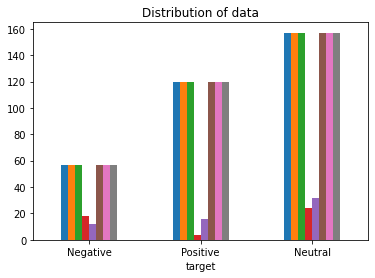

In [84]:
# Plotting the distribution for dataset.
ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive',"Neutral"], rotation=0)
# Storing data in lists.
text, sentiment = list(df['text']), list(df['target'])

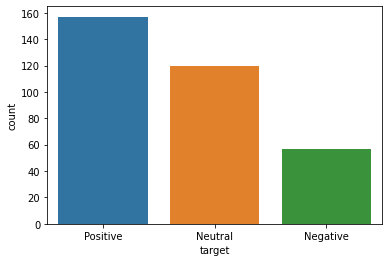

In [85]:
import seaborn as sns
sns.countplot(x='target', data=df)